In [1]:
import numpy as np
import matplotlib.pyplot as mpl
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
mpl.rc("figure", figsize=(8,8))

## Visualization of Dipole Magnetic Field

The magnetic field for a magnetic dipole moment, $\mathbf{m}$, at the origin is,

$\mathbf{B}(\mathbf{r}) = \dfrac{\mu_0}{4 \pi} \left(\dfrac{3\mathbf{r}(\mathbf{m}\cdot\mathbf{r})}{r^5}-\dfrac{\mathbf{m}}{r^3}\right)$

where $\mathbf{r}$ is the vector pointing from the origin to any point in space.

We can normalize this for a given magnetic dipole moment to make this a simple geometric plot.

$\tilde{\mathbf{B}} = \dfrac{4 \pi}{\mu_0 |\mathbf{m}|}\mathbf{B}(\mathbf{r}) = \left(\dfrac{3\mathbf{r}(\hat{m}\cdot\mathbf{r})}{r^5}-\dfrac{\hat{m}}{r^3}\right)$

Let's assume the dipole points in the $y$ direction ($\hat{m} = \hat{y}$), so that the 2D components are given below,

$\tilde{B}_x = \dfrac{4 \pi}{\mu_0 |\mathbf{m}|}B_x = \left(\dfrac{3 xy}{(x^2+y^2)^{5/2}}\right)$

$\tilde{B}_y = \dfrac{4 \pi}{\mu_0 |\mathbf{m}|}B_y = \left(\dfrac{3y^2}{(x^2+y^2)^{5/2}} - \dfrac{1}{(x^2+y^2)^{3/2}}\right)$

[-1, 1.0, -1, 1.0]

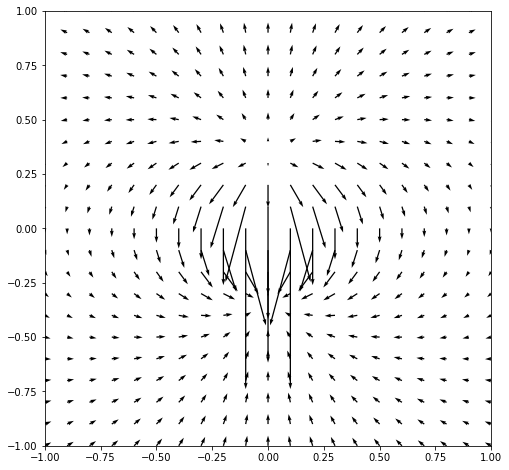

In [3]:
start = -1
step = 0.1
end = 1 + step
skip = 1 # set to 1 for all points
Blim = 1e4

x = np.arange(start,end,step)
y = np.arange(start,end,step)
X, Y = np.meshgrid(x,y)

normBX = 3*X*Y/(np.sqrt(X**2+Y**2))**(5/2)
normBY = 3*Y**2/(np.sqrt(X**2+Y**2))**(5/2) - 1/(np.sqrt(X**2+Y**2))**(3/2)

# mask to avoid 0,0
normBX_ = np.ma.masked_array(normBX, np.abs(normBX) > Blim)
normBY_ = np.ma.masked_array(normBY, np.abs(normBY) > Blim)


mpl.figure()
Q = mpl.quiver(X[::skip], Y[::skip], normBX_[::skip], normBY_[::skip])
mpl.axis([start, end-step, start, end-step])

[-1, 1.0, -1, 1.0]

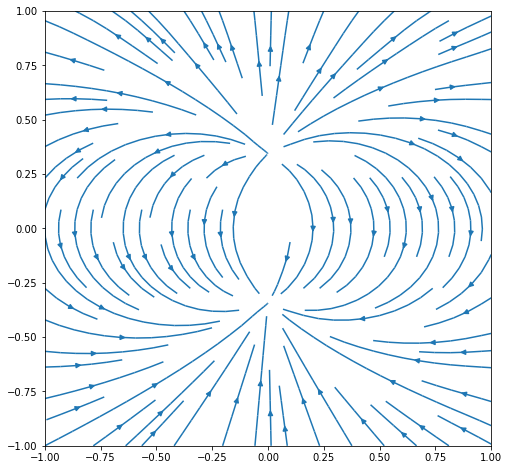

In [4]:
mpl.figure()
Q = mpl.streamplot(X, Y, normBX_, normBY_)
mpl.axis([start, end-step, start, end-step])